In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
audio = "../aduio/audio.wav"
y, fs = librosa.load(audio, sr=None)

start_time = 0.132
end_time = 0.281
vs = librosa.time_to_samples(start_time, sr=fs)
ve = librosa.time_to_samples(end_time, sr=fs)
voiced = y[vs:ve]

print(vs)
print(ve)
print(len(voiced))

2910
6196
3286


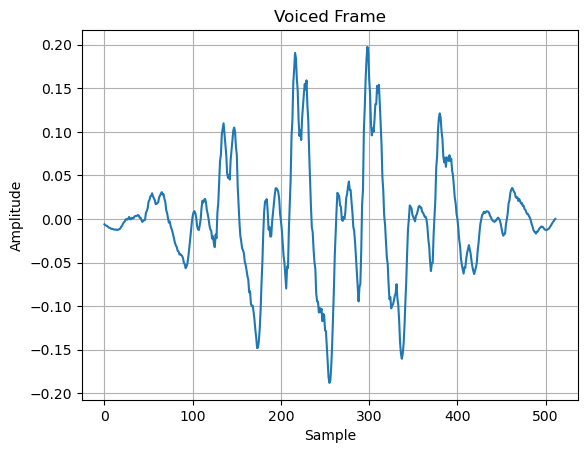

In [9]:
# make same shape
win_size = 512
voiced = voiced[:win_size]
windowed_frame = voiced * np.hamming(win_size)

plt.figure()
plt.plot(windowed_frame)
plt.title('Voiced Frame')
plt.ylabel('Amplitude')
plt.xlabel('Sample')
plt.grid(True)
plt.show()

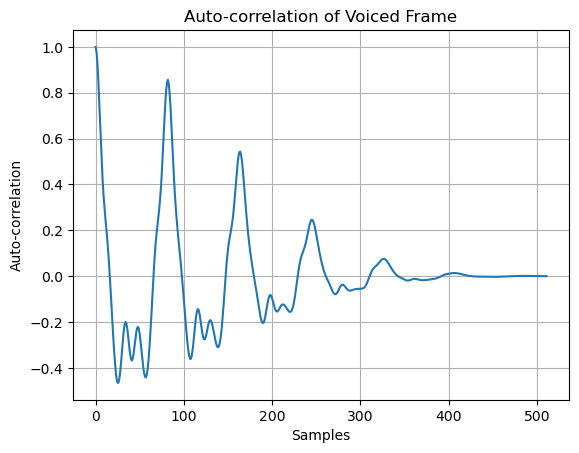

Pitch estimated from auto-correlation: 268.90 Hz


In [21]:
auto_corr = np.correlate(windowed_frame, windowed_frame, mode="full")
auto_corr /= np.max(auto_corr)
auto_corr = auto_corr[len(auto_corr) // 2 :] # symmteric, take only half

samples = np.arange(0, len(auto_corr))
plt.figure()
plt.plot(samples, auto_corr)
plt.title("Auto-correlation of Voiced Frame")
plt.xlabel("Samples")
plt.ylabel("Auto-correlation")
plt.grid()
plt.show()

pitch_lag = np.argmax(auto_corr[20:]) + 20
pitch_auto_corr = fs / pitch_lag
print(f"Pitch estimated from auto-correlation: {pitch_auto_corr:.2f} Hz")

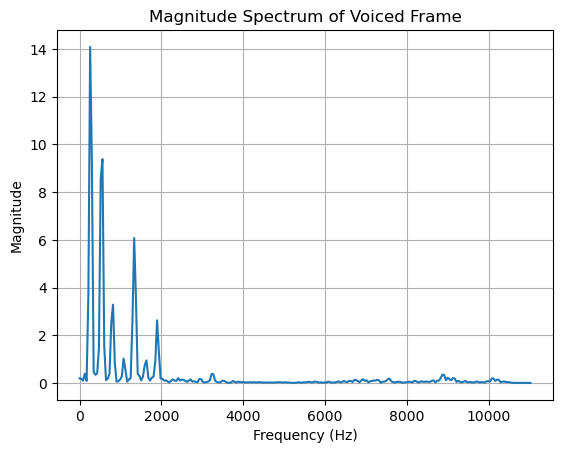

Pitch estimated from spectrum: 258.40 Hz


In [22]:
spectrum = np.abs(np.fft.rfft(windowed_frame))
frequencies = np.fft.rfftfreq(len(windowed_frame), d=1/fs)

plt.figure()
plt.plot(frequencies, spectrum)
plt.title("Magnitude Spectrum of Voiced Frame")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

peak_freq = frequencies[np.argmax(spectrum)]
print(f"Pitch estimated from spectrum: {peak_freq:.2f} Hz")


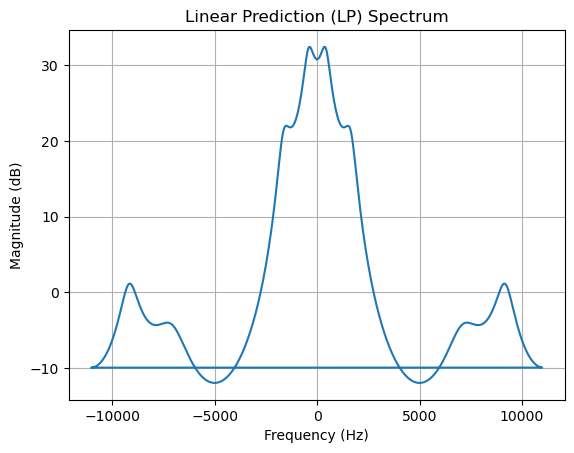

Pitch estimated from LP Spectrum: 387.60 Hz


In [25]:
order = 8
lpc_coeffs = librosa.lpc(windowed_frame, order=order)
lp_ft = (np.fft.fft(lpc_coeffs, len(windowed_frame)))
lp_spectrum = 1.0 / np.abs(lp_ft)

frequencies = np.fft.fftfreq(len(windowed_frame), d=1/fs)

plt.figure()
plt.plot(frequencies, 20 * np.log10(lp_spectrum))
plt.title("Linear Prediction (LP) Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

index = np.argmax(lp_spectrum)
pitch_lp = np.abs(frequencies[index])
print(f"Pitch estimated from LP Spectrum: {pitch_lp:.2f} Hz")